In this notebook is tested the equivalence between Fourier methods and Monte Carlo methods for $\alpha$-stable and Merton models.

In [1]:
%load_ext autoreload
%autoreload 2
import mertonPricer as merton
import alPhaStablePricer as alpha
import utils
import numpy as np
from functools import partial
from scipy import stats as st
from matplotlib import pyplot as plt

Merton model

In [3]:
merton_model = merton.MertonPricer()
merton_model.mu=0
merton_model.sig=0.2
merton_model.lam=0.8
merton_model.muJ=0
merton_model.sigJ=0.5
merton_model.mcm=np.log(merton_model.cf_mert(
                       u=-1j,
                       t=1,
                       mu= 0,
                       sig= 0.2,
                       lam= 0.8,
                       muJ= 0,
                       sigJ= 0.5))

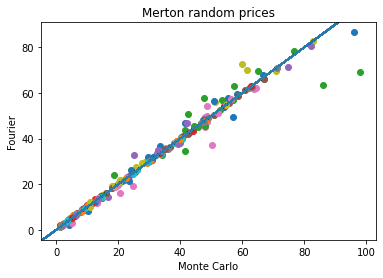

In [9]:
n=100
for i in range(n):
    K= np.random.uniform(10,100,1)  #Exercise price
    S0= np.random.uniform(10,100,1) #Current price
    T=  np.random.uniform(1,20,1) #Maturity time
    r=  np.random.uniform(0,3/100,1)#Risk-free rate
    cf_mert_mcm = partial(merton_model.cf_mert,
                       t=T,
                       mu= r-merton_model.mcm,
                       sig= 0.2,
                       lam= 0.8,
                       muJ= 0,
                       sigJ= 0.5)
    plt.scatter(
    merton_model.mcPricer(K=K,r=r,T=T,S0=S0,payoff="call",N=10000)[0],
    utils.fourierPricer(K=K,S0=S0,r=r,cf=cf_mert_mcm,payoff="call",T=T,udep=True,mcm=0))
    
    plt.scatter(
    merton_model.mcPricer(K=K,r=r,T=T,S0=S0,payoff="put",N=10000)[0],
    utils.fourierPricer(K=K,S0=S0,r=r,cf=cf_mert_mcm,payoff="put",T=T,udep=True,mcm=0))
    
    plt.plot([0,80],[0,80])
    plt.axline([0, 0], [1, 1])
    
    plt.xlabel("Monte Carlo")
    plt.ylabel("Fourier")
    plt.title("Merton random prices")
    

$\alpha$-stable model

In [10]:
alpha_model = alpha.AlPhaStablePricer()

alpha_model.alpha = 1.7
alpha_model.betta = 0.5
alpha_model.mu = 0
alpha_model.c = 0.05



alpha_model.mcm = np.log(alpha_model.cf_stable(t=-1j,
                                        alpha=alpha_model.alpha, 
                                        betta=alpha_model.betta,
                                        mu=alpha_model.mu,
                                        c=alpha_model.c))

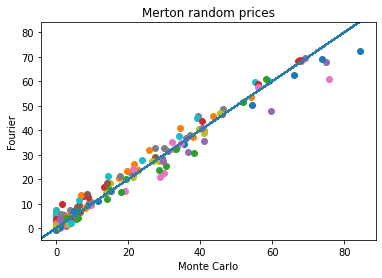

In [11]:
n=100
for i in range(n):
    K= np.random.uniform(10,100,1)  #Exercise price
    S0= np.random.uniform(10,100,1) #Current price
    T=  int(np.random.uniform(1,20,1)) #Maturity time
    r=  np.random.uniform(0,3/100,1)#Risk-free rate
    
    cf_stable_mcm = partial(alpha_model.cf_stable,
                       alpha=alpha_model.alpha,
                       betta=alpha_model.betta,
                       mu=alpha_model.mu+r-alpha_model.mcm,
                       c=alpha_model.c)
    plt.scatter(
    alpha_model.mcPricer(K=K,r=r,T=T,S0=S0,payoff="call",N=100)[0],
    utils.fourierPricer(K=K,S0=S0,r=r,cf=cf_stable_mcm,payoff="call",T=T,udep=True,mcm=0))
    
    plt.scatter(
    alpha_model.mcPricer(K=K,r=r,T=T,S0=S0,payoff="put",N=10000)[0],
    utils.fourierPricer(K=K,S0=S0,r=r,cf=cf_stable_mcm,payoff="put",T=T,udep=True,mcm=0))
    
    plt.plot([0,80],[0,80])
    plt.axline([0, 0], [1, 1])
    
    plt.xlabel("Monte Carlo")
    plt.ylabel("Fourier")
    plt.title("Merton random prices")


Seems like one ore both of the implementations are wrong , at leats Monte Carlo implementatios does not work, since random variable sampling from scipy.stats.levy_stable has some bugs, see https://github.com/scipy/scipy/pull/9523